In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.makedirs("../plots/campaign_kpis", exist_ok=True)
df = pd.read_csv("../data/cleaned_superstore_rfm.csv")

In [3]:
kpis = {"KPI": [], "Value": []}

In [4]:
resp_rate = df["Response"].mean() * 100

kpis["KPI"].append("Overall Campaign Response Rate")
kpis["Value"].append(f"{resp_rate:.2f}%")

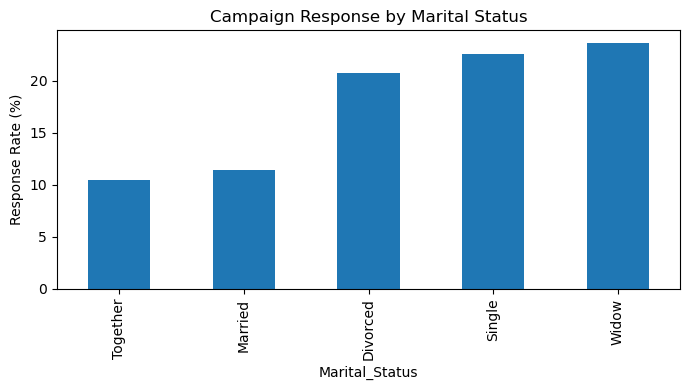

In [5]:
marital_resp = df.groupby("Marital_Status")["Response"].mean() * 100

kpis["KPI"].append("Response Rate by Marital Status")
kpis["Value"].append("; ".join([f"{k}: {v:.2f}%" for k, v in marital_resp.items()]))

plt.figure(figsize=(7, 4))
marital_resp.sort_values().plot(kind="bar")
plt.title("Campaign Response by Marital Status")
plt.ylabel("Response Rate (%)")
plt.tight_layout()
plt.savefig("../plots/campaign_kpis/response_by_marital_status.png")
plt.show()

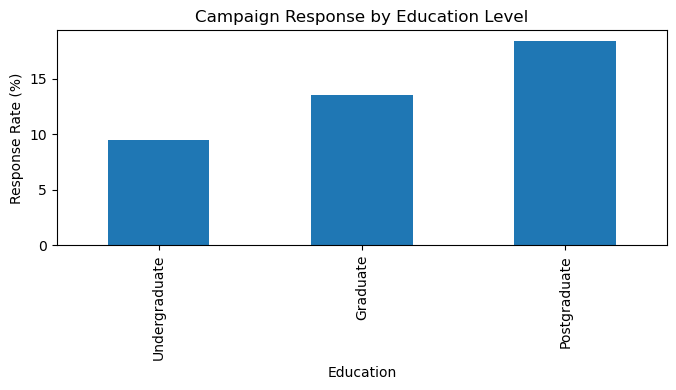

In [6]:
edu_resp = df.groupby("Education")["Response"].mean() * 100

kpis["KPI"].append("Response Rate by Education Level")
kpis["Value"].append("; ".join([f"{k}: {v:.2f}%" for k, v in edu_resp.items()]))

plt.figure(figsize=(7, 4))
edu_resp.sort_values().plot(kind="bar")
plt.title("Campaign Response by Education Level")
plt.ylabel("Response Rate (%)")
plt.tight_layout()
plt.savefig("../plots/campaign_kpis/response_by_education.png")
plt.show()

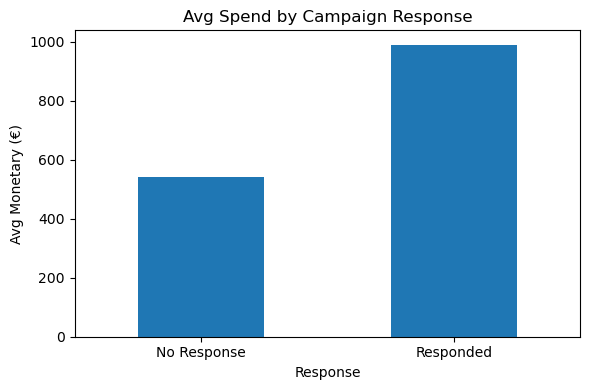

In [7]:
lift = df.groupby("Response")["Monetary"].mean()
lift_value = (lift[1] - lift[0]) / lift[0] * 100

kpis["KPI"].append("Campaign Lift (Avg Spend)")
kpis["Value"].append(f"{lift_value:.2f}% increase")

plt.figure(figsize=(6, 4))
lift.plot(kind="bar", title="Avg Spend by Campaign Response")
plt.ylabel("Avg Monetary (€)")
plt.xticks([0, 1], ["No Response", "Responded"], rotation=0)
plt.tight_layout()
plt.savefig("../plots/campaign_kpis/campaign_lift_spend.png")
plt.show()

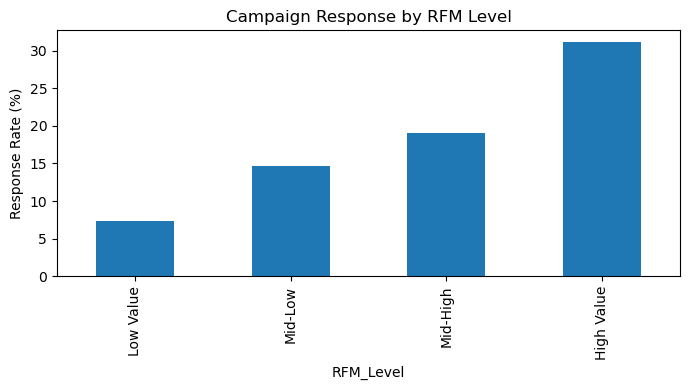

In [8]:
rfm_resp = df.groupby("RFM_Level")["Response"].mean() * 100

kpis["KPI"].append("Response Rate by RFM Level")
kpis["Value"].append("; ".join([f"{k}: {v:.2f}%" for k, v in rfm_resp.items()]))

plt.figure(figsize=(7, 4))
rfm_resp.sort_values().plot(kind="bar")
plt.title("Campaign Response by RFM Level")
plt.ylabel("Response Rate (%)")
plt.tight_layout()
plt.savefig("../plots/campaign_kpis/response_by_rfm_level.png")
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2205 non-null   int64  
 1   Year_Birth            2205 non-null   int64  
 2   Education             2205 non-null   object 
 3   Marital_Status        2205 non-null   object 
 4   Income                2205 non-null   float64
 5   Kidhome               2205 non-null   int64  
 6   Teenhome              2205 non-null   int64  
 7   Dt_Customer           2205 non-null   object 
 8   Recency               2205 non-null   int64  
 9   MntWines              2205 non-null   int64  
 10  MntFruits             2205 non-null   int64  
 11  MntMeatProducts       2205 non-null   int64  
 12  MntFishProducts       2205 non-null   int64  
 13  MntSweetProducts      2205 non-null   int64  
 14  MntGoldProds          2205 non-null   int64  
 15  NumDealsPurchases    

In [13]:
def get_preferred_channel(row):
    purchases = {
        "Web": row["NumWebPurchases"],
        "Catalog": row["NumCatalogPurchases"],
        "Store": row["NumStorePurchases"]
    }
    return max(purchases, key=purchases.get)

In [14]:
df["Preferred_Channel"] = df.apply(get_preferred_channel, axis=1)

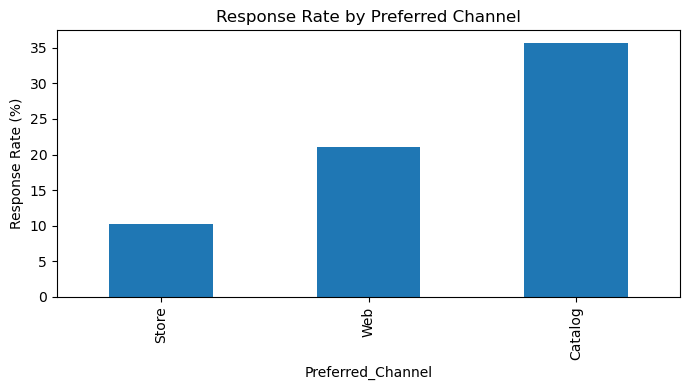

In [15]:
channel_resp = df.groupby("Preferred_Channel")["Response"].mean() * 100

kpis["KPI"].append("Response by Preferred Channel")
kpis["Value"].append("; ".join([f"{k}: {v:.2f}%" for k, v in channel_resp.items()]))

plt.figure(figsize=(7, 4))
channel_resp.sort_values().plot(kind="bar")
plt.title("Response Rate by Preferred Channel")
plt.ylabel("Response Rate (%)")
plt.tight_layout()
plt.savefig("../plots/campaign_kpis/response_by_channel.png")
plt.show()

In [16]:
pd.DataFrame(kpis).to_csv("../exports/campaign_kpis_summary.csv", index=False)